## Importing all packages that will be used in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Read dataset

In [2]:
bankrate = pd.read_csv('bankrate.csv')
print(bankrate.shape)
bankrate.head()

# conever CDTerm, APY and min to num

(346, 4)


,BankName,CDTerm,APY,Min.deposit
0,Third Federal Savings & Loan Association of Cl...,1mo,5.40%,$500
1,CBIC Bank USA CD,1yr,5.36%,$0
2,CBIC Bank USA CD,13mo,5.36%,"$1,000"
3,Rising Bank,6mo,5.35%,"$1,000"
4,CFG Bank CD,1yr,5.31%,$500


In [3]:
Treasury_Bills_Rates = pd.read_csv('Treasury Bills Rates.csv')
print(Treasury_Bills_Rates.shape)
Treasury_Bills_Rates.head()
# convert security_term to fix time, separate bill/note/Bond

(10000, 7)


,cusip,security_type,security_term,auction_date,issue_date,maturity_date,price_per100
0,912827KC5,Note,10-Year,1979-10-31,1979-11-15,1989-11-15,NaN
1,912810CK2,Bond,30-Year,1979-11-01,1979-11-15,2009-11-15,NaN
2,9127933Y0,Bill,13-Week,1979-12-28,1980-01-03,1980-04-03,NaN
3,9127934U7,Bill,26-Week,1979-12-28,1980-01-03,1980-07-03,NaN
4,9127935W2,Bill,52-Week,1980-01-02,1980-01-08,1981-01-02,NaN


In [4]:
Yahoo_Finance_ETFs = pd.read_csv('Yahoo Finance ETFs.csv')
print(Yahoo_Finance_ETFs.shape)
Yahoo_Finance_ETFs.head()
# drop unnamed:8, % changed change format 

(522, 9)


,Symbol,Name,Price,Change,% change,Volume,50 Days Average,200 Day Average,Unnamed: 8
0,KARS,KraneShares Electric Vehicles and Future Mobil...,21.46,0.35,+1.66%,"7,459",22.15,25.76,NaN
1,ECH,iShares MSCI Chile ETF,26.27,0.38,+1.47%,"148,914",26.13,26.90,NaN
2,CHIQ,Global X MSCI China Consumer Discretionary ETF,17.06,0.24,+1.46%,"56,880",16.93,17.82,NaN
3,KBWP,Invesco KBW Property & Casualty Insurance ETF,101.92,1.30,+1.29%,"66,443",102.97,91.41,NaN
4,EPU,iShares MSCI Peru ETF,39.88,0.48,+1.22%,"9,890",37.37,33.07,NaN


## bankrate dataset
For bankrate, we want to conever CDTerm, APY and min to number, so we can visualize the plot and do some analysis

#### Clean data (ie. changed format, drop NaN etc.)

In [5]:
# convert CDTerm to month for standardizing the period format 
def convert_cd_term(term):
    if 'mo' in term:
        return int(term.replace('mo', ''))
    elif 'yr' in term:
        # converting year to months
        year_value = float(term.replace('yr', ''))
        return int(year_value * 12)
    else:
        return int(term) 

In [6]:
bankrate['CDTerm'] = bankrate['CDTerm'].apply(convert_cd_term)

In [7]:
# Remove '%' from APY and convert to float
bankrate['APY'] = bankrate['APY'].str.replace('%', '').astype(float)

# Remove commas and dollar signs from Min.deposit and convert to float
bankrate['Min.deposit'] = bankrate['Min.deposit'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [8]:
bankrate.head()

,BankName,CDTerm,APY,Min.deposit
0,Third Federal Savings & Loan Association of Cl...,1,5.40,500.0
1,CBIC Bank USA CD,12,5.36,0.0
2,CBIC Bank USA CD,13,5.36,1000.0
3,Rising Bank,6,5.35,1000.0
4,CFG Bank CD,12,5.31,500.0


#### Plot and Anlysis

In [9]:
# summary_statistics for general CD
summary_statistics = bankrate.describe()
summary_statistics

,CDTerm,APY,Min.deposit
count,346.000000,346.000000,346.000000
mean,11.667630,2.969971,1717.774566
std,7.817257,1.979034,3630.112861
min,1.000000,0.010000,0.000000
25%,6.000000,0.550000,500.000000
50%,12.000000,3.760000,1000.000000
75%,18.000000,4.800000,1000.000000
max,24.000000,5.400000,25000.000000


The average term for CDs is approximately 12 months (1 year), with a maximum of 24 months(2 year).<br>
The APY varies significantly, with 1.979% Standard deviation, ranging from a minimum of 0.01% to a maximum of 5.40%, indicating a wide range of investment options.<br>
The minimum deposit required also varies, some CDs requiring no initial deposit and others up to $25,000.<br>

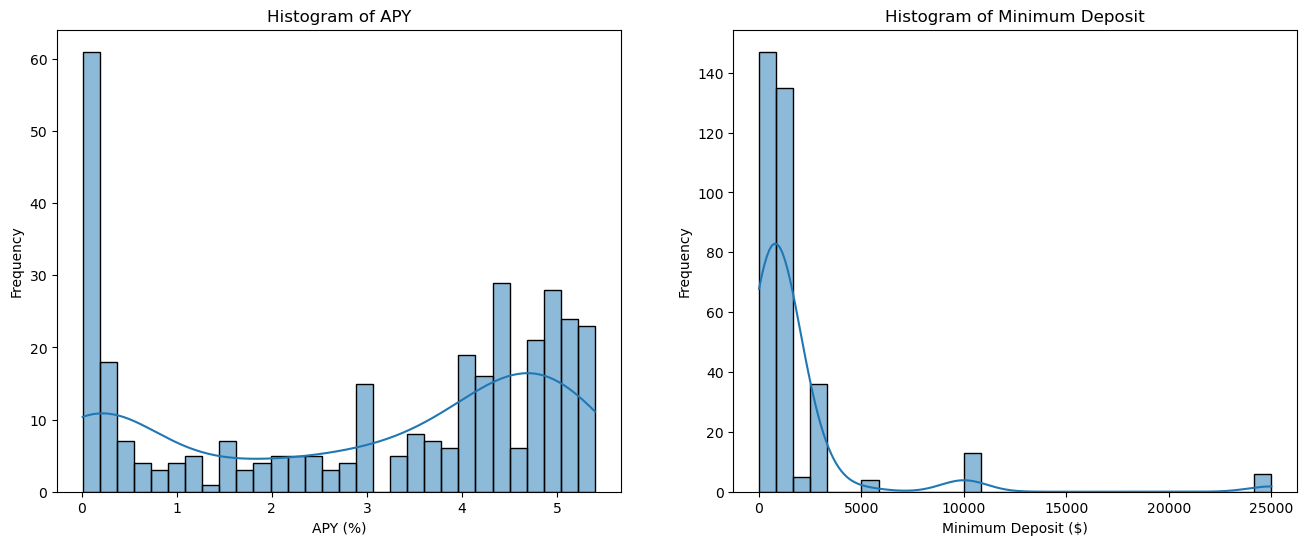

In [10]:
# subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of APY
sns.histplot(bankrate['APY'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of APY')
axes[0].set_xlabel('APY (%)')
axes[0].set_ylabel('Frequency')

# Histogram of Min.deposit
sns.histplot(bankrate['Min.deposit'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Minimum Deposit')
axes[1].set_xlabel('Minimum Deposit ($)')
axes[1].set_ylabel('Frequency')

plt.show()

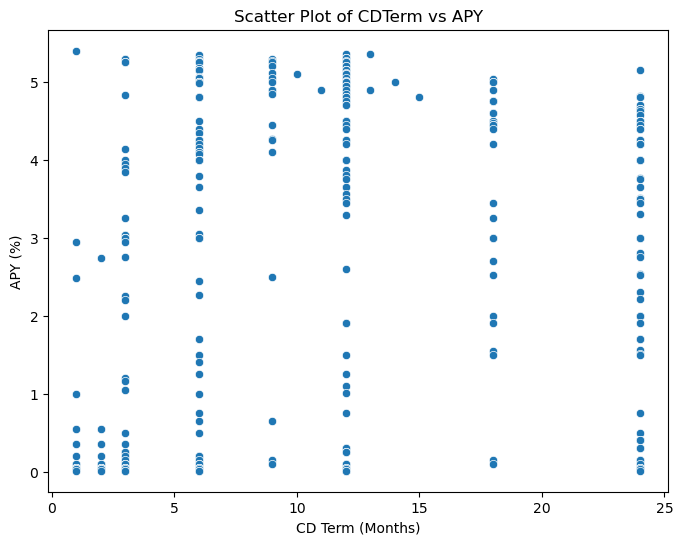

In [11]:
# Scatter plot of CDTerm vs APY
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CDTerm', y='APY', data=bankrate)
plt.title('Scatter Plot of CDTerm vs APY')
plt.xlabel('CD Term (Months)')
plt.ylabel('APY (%)')
plt.show()

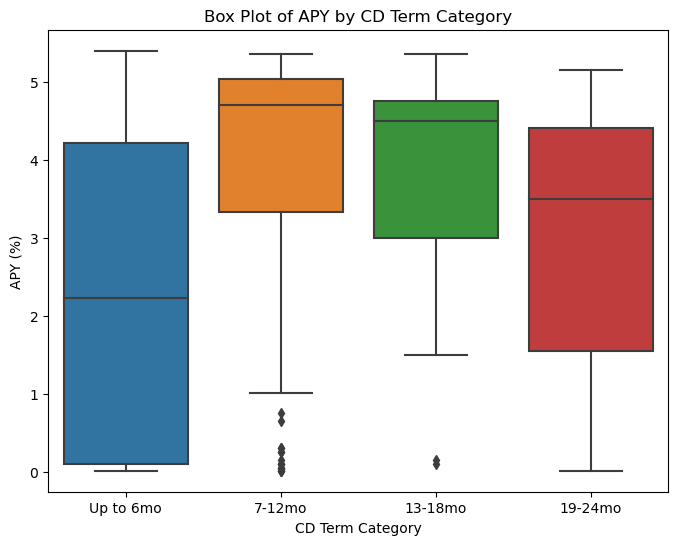

In [12]:
# Create bins for the CD terms for analysis which period gives the highest yield
bins = [0, 6, 12, 18, 24]
labels = ['Up to 6mo', '7-12mo', '13-18mo', '19-24mo']
bankrate['periodCategory'] = pd.cut(bankrate['CDTerm'], bins=bins, labels=labels)

# Box plot of APY by CDTerm range
plt.figure(figsize=(8, 6))
sns.boxplot(x='periodCategory', y='APY', data=bankrate)
plt.title('Box Plot of APY by CD Term Category')
plt.xlabel('CD Term Category')
plt.ylabel('APY (%)')
plt.show()

From the plot of Histogram of APY it seems that there are two major groups: <br>
 1. Low APYs: A significant number of CDs offer very low yields, close to 0%. <br>
 2. High APYs: Another clear grouping appears at higher yields, peaking around 5%. <br>
Investors most likely will be looking for higher returns, so they will consider targeting CDs that fall into the high APY cluster, but they should also consider terms and conditions. <br>
<br>

From the plot of Histogram of Minimum Deposit we can see that the distribution is skewed towards lower amounts, with a significant peak at around $1,000. There are also some CDs that require no initial deposit, which increasing their accessibility.<br>

<br>

From the plot of Scatter Plot of CDTerm vs APY, we do not see a strong, clear correlation between the term of the CD (in months) and the APY, the data points are spread widely across different terms.<br>

<br>

From the plot of Box Plot of APY by CD Term Category, the box plot groups CDs by term length and shows the range of APYs within each category. For Short-term CDs (Up to 6 months) tend to have a narrower range of APYs, the medium is around a little more than 2%. The highest yield overall from the plot is 7-12 mo with a wide range and around 4.8% APY. Following that is 13-18 mo and 19-24mo. <br>

In conclusion, there is no significant correlation showing that longer terms lead to higher APYs. Many CDs require no minimum deposit, making them accessible to most people who want to start investing. A good option for beginners with limited funds would be to find a bank that offers a 7-12 month CD with no minimum deposit or one that requires less than $1000 to start.

## Treasury_Bills_Rates dataset

For Treasury_Bills_Rates, we want to convert security_term to fix time, separate bill/note/Bond for better analysis

#### Clean data (ie. changed format, drop NaN etc.)

In [13]:
Treasury_Bills_Rates['security_type'].unique()

array(['Note', 'Bond', 'Bill', 'CMB', 'TIPS Note', 'TIPS Bond',
       'FRN Note'], dtype=object)

In [14]:
# To make it easier to anylsis, we are going to group the different types of Treasury securities 
# into broader categories

security_type = {
    'Note': 'Note',
    'Bond': 'Bond',
    'Bill': 'Bill',
    'CMB': 'Bill',  # Cash Management Bills are a type of Treasury Bill
    'TIPS Note': 'Note',  # TIPS can be considered a type of Note
    'TIPS Bond': 'Bond',  # TIPS can also be considered a type of Bond
    'FRN Note': 'Note'  # Floating Rate Notes are a type of Note
}

# create a new columns to store the new grouping
Treasury_Bills_Rates['general_security_type'] = Treasury_Bills_Rates['security_type'].map(security_type)

In [15]:
# There are some NaN value for 'price_per100', instead of dropping all the NaN, we use the data imputation 
# techique to fill the NaN value. For simplicity, we filled the NaN value with median, 
# separated by 'security_type'

# Calculate the median of 'price_per100' for each 'security_type'
medians = Treasury_Bills_Rates.groupby('general_security_type')['price_per100'].transform('median')
# print(medians)

# Fill NaN values
Treasury_Bills_Rates['price_per100'] = Treasury_Bills_Rates['price_per100'].fillna(medians)

In [16]:
Treasury_Bills_Rates.head(2)

,cusip,security_type,security_term,auction_date,issue_date,maturity_date,price_per100,general_security_type
0,912827KC5,Note,10-Year,1979-10-31,1979-11-15,1989-11-15,99.83254,Note
1,912810CK2,Bond,30-Year,1979-11-01,1979-11-15,2009-11-15,98.91070,Bond


In [17]:
# convert security_term to fix time
def convert_security_term_to_months(term):
    if 'Week' in term:
        # Convert weeks to months (for simplicity assume there is approximately 4 weeks per month)
        return int(term.split('-')[0]) / 4
    elif 'Month' in term:
        return int(term.split('-')[0])
    elif 'Year' in term:
        # Convert years to months
        return int(term.split('-')[0]) * 12

In [18]:
Treasury_Bills_Rates['security_term_in_months'] = Treasury_Bills_Rates['security_term'].apply(convert_security_term_to_months)
Treasury_Bills_Rates.head(2)

,cusip,security_type,security_term,auction_date,issue_date,maturity_date,price_per100,general_security_type,security_term_in_months
0,912827KC5,Note,10-Year,1979-10-31,1979-11-15,1989-11-15,99.83254,Note,120.0
1,912810CK2,Bond,30-Year,1979-11-01,1979-11-15,2009-11-15,98.91070,Bond,360.0


In [19]:
# Convert 'issue_date' to datetime
Treasury_Bills_Rates['issue_date'] = pd.to_datetime(Treasury_Bills_Rates['issue_date'])
# extract the year and with new columns called 'issue_year'
Treasury_Bills_Rates['issue_year'] = Treasury_Bills_Rates['issue_date'].dt.year
Treasury_Bills_Rates.head(2)

,cusip,security_type,security_term,auction_date,issue_date,maturity_date,price_per100,general_security_type,security_term_in_months,issue_year
0,912827KC5,Note,10-Year,1979-10-31,1979-11-15,1989-11-15,99.83254,Note,120.0,1979
1,912810CK2,Bond,30-Year,1979-11-01,1979-11-15,2009-11-15,98.91070,Bond,360.0,1979


#### Plot and Anlysis

In [20]:
# Security Type Price Analysis
price_statistics_by_security_type = Treasury_Bills_Rates.groupby('general_security_type')['price_per100'].describe()
price_statistics_by_security_type.transpose()

general_security_type,Bill,Bond,Note
count,7491.000000,386.000000,2123.000000
mean,99.590414,99.360126,99.951917
std,0.686005,4.738242,1.577040
min,93.933000,81.754227,89.111177
25%,99.627638,98.042652,99.715415
50%,99.845903,98.910700,99.832540
75%,99.936806,99.603991,99.922882
max,100.000000,132.953297,115.601579


In [21]:
# stats for length 
term_statistics_by_security_type = Treasury_Bills_Rates.groupby('general_security_type')['security_term_in_months'].describe()
term_statistics_by_security_type.transpose()

general_security_type,Bill,Bond,Note
count,6620.000000,386.00000,2123.000000
mean,4.636782,148.69171,44.719736
std,3.089337,156.54522,34.451610
min,1.000000,14.00000,1.000000
25%,3.250000,29.00000,24.000000
50%,3.250000,29.00000,36.000000
75%,6.500000,360.00000,60.000000
max,13.000000,360.00000,120.000000


<Figure size 1800x1600 with 0 Axes>

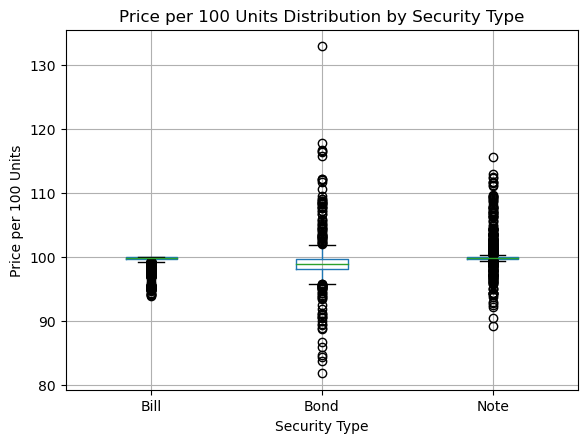

In [22]:
# Box Plot for price distributions by security type
plt.figure(figsize=(18, 16))
Treasury_Bills_Rates.boxplot(column='price_per100', by='general_security_type')
plt.title('Price per 100 Units Distribution by Security Type')
plt.suptitle('')  
plt.xlabel('Security Type')
plt.ylabel('Price per 100 Units')
plt.show()

Based on the chart and box plot, we can see that Bills have the most consistent pricing with the lowest standard deviation and the smallest spread in prices. The prices are tightly clustered around the mean, with the narrowest interquartile range, indicating low variability and possibly less risk. Bills are typically short-term investments, with the lowest average term in months (4.64) and a narrow interquartile range (3.25 to 6.5 months).<br>

Bonds exhibit the highest variability in prices, indicated by the largest standard deviation, wider range and several outliers, suggesting a higher risk and potential for higher returns. Bonds have a significantly higher average term (148.69 months), indicating they are long-term investments. The wide range between the 25th percentile and the maximum term (29 to 360 months) reflects the variety of bond durations.<br>

Notes have a moderate mean price and variability, with a few outliers, suggesting they are priced between Bills and Bonds in terms of stability and variability. Notes show a wide distribution in terms (mean of 44.72 months), with a larger standard deviation (34.45) compared to Bills, suggesting that notes come in a variety of term lengths from short to medium-term investments.<br>

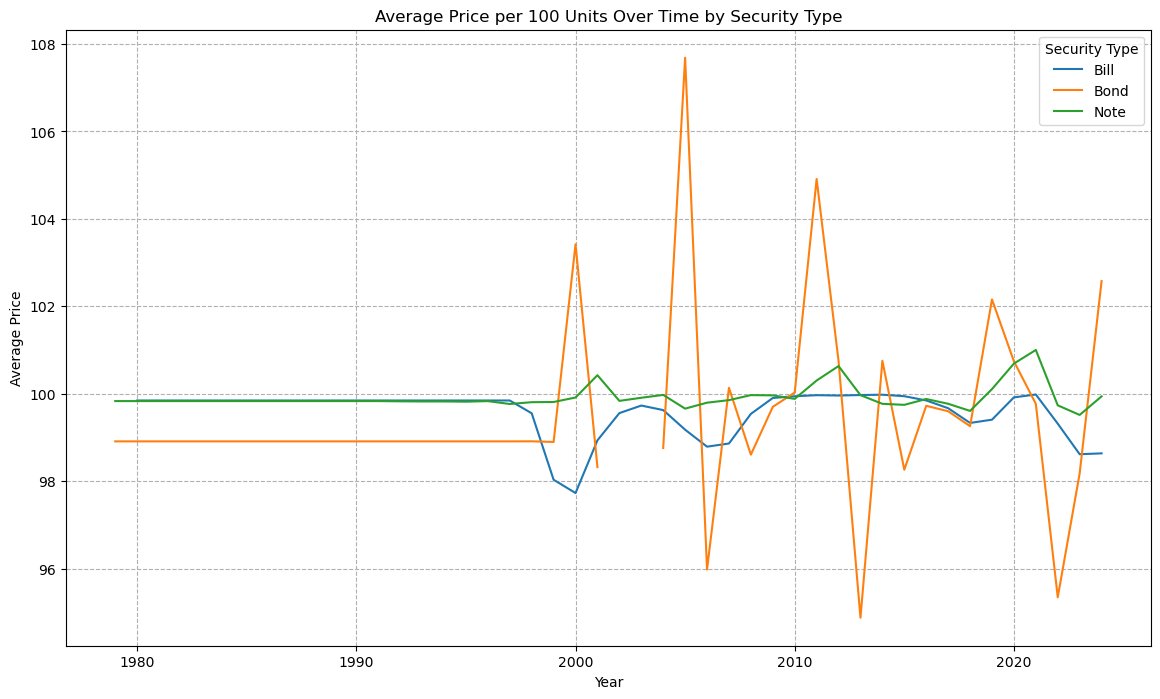

In [23]:
# Time Series Plot for average prices over the years
average_prices_yearly = Treasury_Bills_Rates.groupby(['issue_year', 'general_security_type'])['price_per100'].mean().unstack()

plt.figure(figsize=(14, 8))

for column in average_prices_yearly.columns:
    plt.plot(average_prices_yearly.index, average_prices_yearly[column], label=column)
    
plt.title('Average Price per 100 Units Over Time by Security Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Security Type')
plt.grid(True, linestyle='--')
plt.show()

Based on the Time Series Plot we see the volatility of Bonds (orange line) exhibit the highest in prices over time, with several prominent spikes, which might be indicative of economic events or policy changes affecting long-term debt instruments more significantly than shorter-term securities. On the other hand, based on the plot the stability of Bills (blue line) appear to have the most stable in average price over time, maintaining a relatively flat trend close to the 100 price mark.The Notes (green line) display a price trend that fluctuates between that of bills and bonds. 

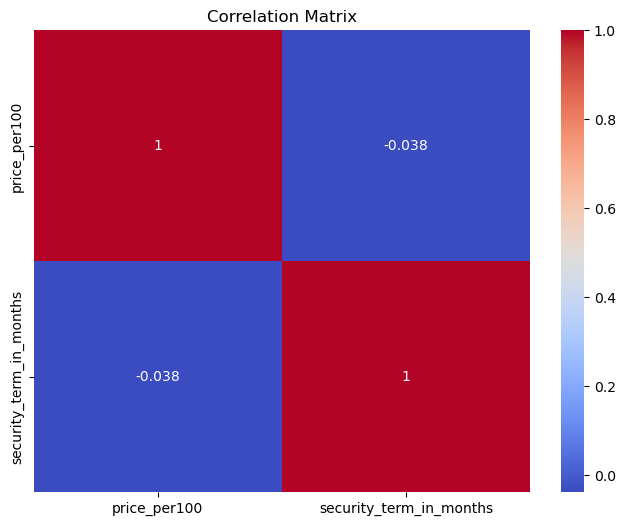

In [24]:
# Correlation Matrix Heatmap
correlation_matrix = Treasury_Bills_Rates[['price_per100', 'security_term_in_months']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation between price_per100 and security_term_in_months is -0.036 suggesting that there is a very weak negative linear relationship between these two variables. This means that as the term in months changes, there is almost no change or slightly change in the price per 100 units and vice versa.

## Yahoo_Finance_ETFs dataset

For Yahoo_Finance_ETFs, we want to drop unnamed:8 and all the 'object' type to differnt format for better analysis

#### Clean data (ie. changed format, drop NaN etc.)

In [25]:
# get info for this dataframe since the type is not as clear as previous two table 
Yahoo_Finance_ETFs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           522 non-null    object 
 1   Name             522 non-null    object 
 2   Price            522 non-null    float64
 3   Change           522 non-null    float64
 4   % change         522 non-null    object 
 5   Volume           522 non-null    object 
 6   50 Days Average  522 non-null    float64
 7   200 Day Average  522 non-null    float64
 8   Unnamed: 8       0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 36.8+ KB


In [26]:
Yahoo_Finance_ETFs
# drop unnamed:8, changed all the object type

,Symbol,Name,Price,Change,% change,Volume,50 Days Average,200 Day Average,Unnamed: 8
0,KARS,KraneShares Electric Vehicles and Future Mobil...,21.46,0.35,+1.66%,"7,459",22.15,25.76,NaN
1,ECH,iShares MSCI Chile ETF,26.27,0.38,+1.47%,"148,914",26.13,26.90,NaN
2,CHIQ,Global X MSCI China Consumer Discretionary ETF,17.06,0.24,+1.46%,"56,880",16.93,17.82,NaN
3,KBWP,Invesco KBW Property & Casualty Insurance ETF,101.92,1.30,+1.29%,"66,443",102.97,91.41,NaN
4,EPU,iShares MSCI Peru ETF,39.88,0.48,+1.22%,"9,890",37.37,33.07,NaN
...,...,...,...,...,...,...,...,...,...
517,SMH,VanEck Semiconductor ETF,208.63,-3.77,-1.77%,10.299M,216.64,173.05,NaN
518,PSI,Invesco Semiconductors ETF,52.16,-1.05,-1.97%,"58,099",54.58,47.33,NaN
519,XSD,SPDR S&P Semiconductor ETF,210.17,-4.27,-1.99%,"33,852",224.92,210.45,NaN
520,GXG,Global X MSCI Colombia ETF,24.69,-0.56,-2.22%,"15,770",24.29,22.32,NaN


In [27]:
# Remove the 'Unnamed: 8' column since it only contains NaN value (On the website it's a graphic 
# representation of price range, therefore, it display as NaN when we scape the table  )
Yahoo_Finance_ETFs.drop('Unnamed: 8', axis=1, inplace=True)

In [28]:
# Convert 'Volume' to integer, 'Volume' cotains 'M' for million like line 517, and K for thousands 
def convert_volume(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1_000_000)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1_000)
    else:
        return int(value)

Yahoo_Finance_ETFs['Volume'] = Yahoo_Finance_ETFs['Volume'].str.replace(',', '').apply(convert_volume)

In [29]:
# Convert '% change' from string to float
Yahoo_Finance_ETFs['% change'] = Yahoo_Finance_ETFs['% change'].str.rstrip('%').astype(float)

In [30]:
Yahoo_Finance_ETFs.tail()

,Symbol,Name,Price,Change,% change,Volume,50 Days Average,200 Day Average
517,SMH,VanEck Semiconductor ETF,208.63,-3.77,-1.77,10299000,216.64,173.05
518,PSI,Invesco Semiconductors ETF,52.16,-1.05,-1.97,58099,54.58,47.33
519,XSD,SPDR S&P Semiconductor ETF,210.17,-4.27,-1.99,33852,224.92,210.45
520,GXG,Global X MSCI Colombia ETF,24.69,-0.56,-2.22,15770,24.29,22.32
521,PTH,Invesco Dorsey Wright Healthcare Momentum ETF,39.53,-0.98,-2.42,8541,43.54,37.84


In [31]:
Yahoo_Finance_ETFs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           522 non-null    object 
 1   Name             522 non-null    object 
 2   Price            522 non-null    float64
 3   Change           522 non-null    float64
 4   % change         522 non-null    float64
 5   Volume           522 non-null    int64  
 6   50 Days Average  522 non-null    float64
 7   200 Day Average  522 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 32.8+ KB


#### Plot and Anlysis

In [32]:
# statistics for 'Price', 'Change', 'Volume' columns
stats = Yahoo_Finance_ETFs[['Price', 'Change', 'Volume']].describe()
print(stats)

            Price      Change        Volume
count  522.000000  522.000000  5.220000e+02
mean    69.238793   -0.107874  1.059935e+06
std     64.712649    0.499927  4.726660e+06
min     10.390000   -4.720000  1.000000e+00
25%     33.770000   -0.150000  1.373850e+04
50%     49.990000   -0.030000  7.666300e+04
75%     81.217500    0.060000  4.179215e+05
max    501.880000    1.300000  7.390700e+07


Based on the table we can see the price of ETFs are ranging from \\$69.24 to \\$501.88, with the approximately average \\$69.24. The standard deviation is \\$64.71 indicating a wide range of ETF prices. The average daily change is approximately -0.11, suggesting a slight downward movement in the period we analyzed. The volume varies greatly, from \\$1 to 73.9 million, with average volume is about 1.06 million. The standard deviation is about 4.73 million, indicating that volume can vary drastically from one ETF to another. In this case the volumns doesn't entail too much information since each ETF are independent from one another. 

In conclusion there's considerable variability in both the prices and volumes of the ETFs. Based on the statistics table, the change, on average, was a slight decrease, but some ETFs still experienced significant increases or decreases on the day.

In [33]:
# Correlation analysis 
correlation_matrix = Yahoo_Finance_ETFs[['Price', 'Change', 'Volume', '50 Days Average', '200 Day Average']].corr()
print(correlation_matrix)

                    Price    Change    Volume  50 Days Average  \
Price            1.000000 -0.531804  0.352287         0.999574   
Change          -0.531804  1.000000 -0.191323        -0.543611   
Volume           0.352287 -0.191323  1.000000         0.349749   
50 Days Average  0.999574 -0.543611  0.349749         1.000000   
200 Day Average  0.998721 -0.524911  0.348072         0.998877   

                 200 Day Average  
Price                   0.998721  
Change                 -0.524911  
Volume                  0.348072  
50 Days Average         0.998877  
200 Day Average         1.000000  


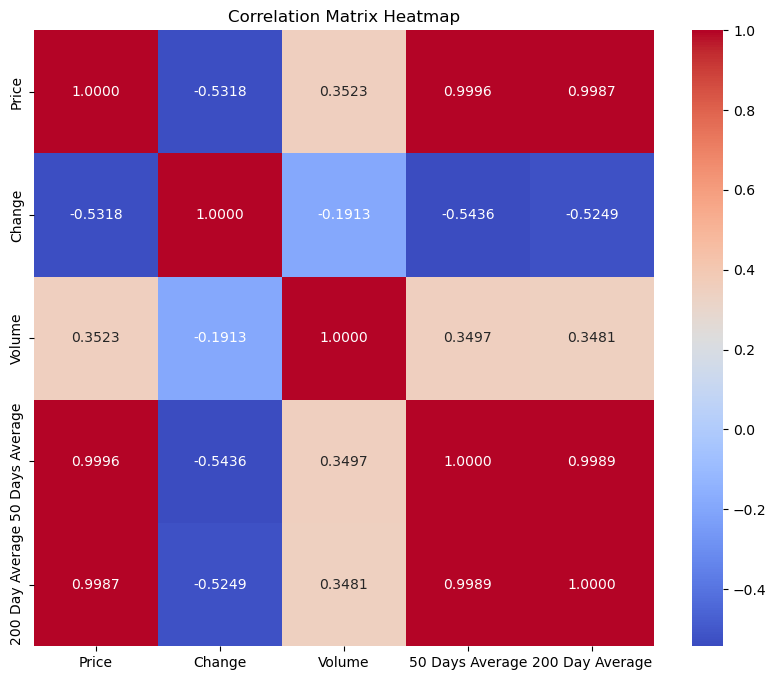

In [34]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the correlation matrix, we can see that there is strong positive correlation between the price of the ETFs with 50-day, and the price of the ETFs with 200-day. This indicates that the moving averages are good indicators of the ETF price. <br>

In addition, there is a moderately negative correlation between the price with the daily change. This could suggest that higher-priced ETFs may tend to have lower percentage changes on a daily basis.<br>

For the rest of them the correlation is pretty weak, meaning that the effect for those variables on each other is not strong enough to suggest a direct or significant relationship. 

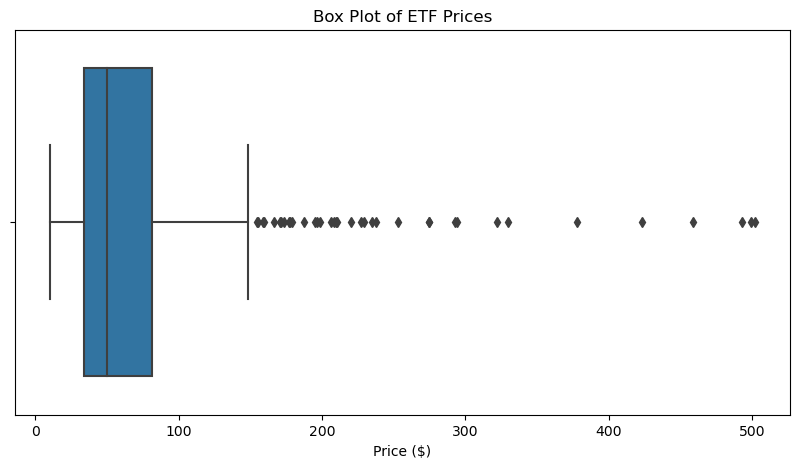

In [35]:
# Box plot for price
plt.figure(figsize=(10, 5))
sns.boxplot(x=Yahoo_Finance_ETFs['Price'])
plt.title('Box Plot of ETF Prices')
plt.xlabel('Price ($)')
plt.show()

The distribution of ETF prices is positively skewed(the median closer to the lower quartile and the long upper whisker). Most ETFs are priced below \\$100, but there are a few outlier reaching up to around \\$500. The outliers and range indicating the high variability. 

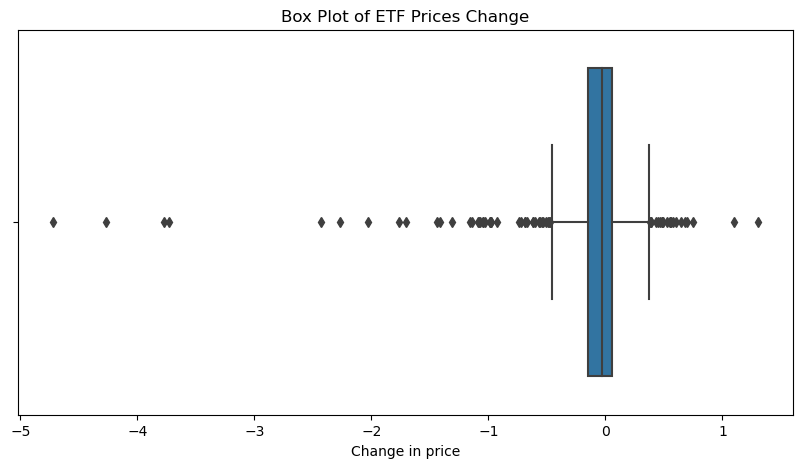

In [36]:
# Box plot for change
plt.figure(figsize=(10, 5))
sns.boxplot(x=Yahoo_Finance_ETFs['Change'])
plt.title('Box Plot of ETF Prices Change')
plt.xlabel('Change in price')
plt.show()

The distribution of price changes is centered around zero with some significant deviations(outliers). The spread of changes on both the positive and negative sides seems roughly symmetrical, indicating that the market conditions affected rises and falls in ETF prices relatively equally over the period analyzed.

## Joint analysis

In [37]:
# Calculate APY for the Treasury data
Treasury_Bills_Rates['APY'] = (100 - Treasury_Bills_Rates['price_per100']) / Treasury_Bills_Rates['price_per100']/ Treasury_Bills_Rates['security_term_in_months']*12*100

In [38]:
Treasury_Bills_Rates.tail()

,cusip,security_type,security_term,auction_date,issue_date,maturity_date,price_per100,general_security_type,security_term_in_months,issue_year,APY
9995,912797JL2,Bill,4-Week,2024-02-29,2024-03-05,2024-04-02,99.588944,Bill,1.00,2024,4.953032
9996,912797KH9,Bill,17-Week,2024-02-28,2024-03-05,2024-07-02,98.272847,Bill,4.25,2024,4.962375
9997,912797JQ1,Bill,8-Week,2024-02-29,2024-03-05,2024-04-30,99.177889,Bill,2.00,2024,4.973554
9998,912797GL5,Bill,26-Week,2024-03-04,2024-03-07,2024-09-05,97.419139,Bill,6.50,2024,4.890894
9999,912797HT7,Bill,13-Week,2024-03-04,2024-03-07,2024-06-06,98.675444,Bill,3.25,2024,4.956318


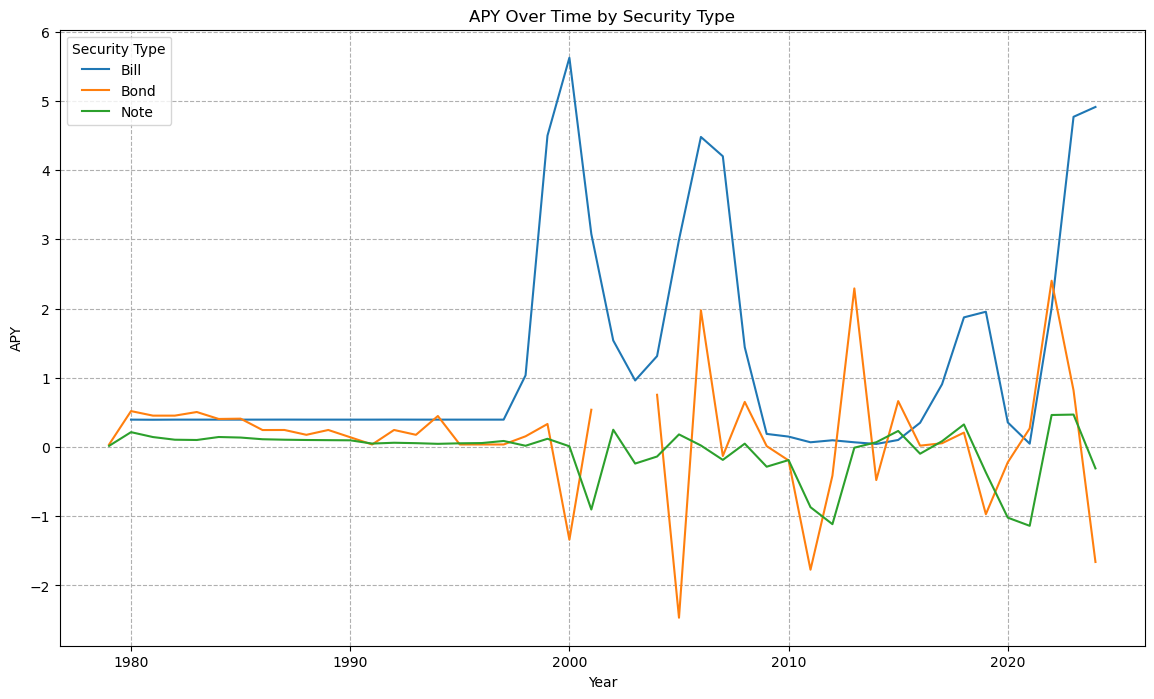

In [39]:
# Time Series Plot for APY
APY = Treasury_Bills_Rates.groupby(['issue_year', 'general_security_type'])['APY'].mean().unstack()

plt.figure(figsize=(14, 8))

for column in APY.columns:
    plt.plot(APY.index, APY[column], label=column)
    
plt.title('APY Over Time by Security Type')
plt.xlabel('Year')
plt.ylabel('APY')
plt.legend(title='Security Type')
plt.grid(True, linestyle='--')
plt.show()

##### Try to compare the Treasury invest VS CD, divided by short-term (defined as 12 month) and Long-term

In [41]:
short_term_limit = 12

# Treasury short-term and long-term APY
treasury_short_term_yield = Treasury_Bills_Rates[Treasury_Bills_Rates['security_term_in_months'] <= short_term_limit]['APY'].mean()
treasury_long_term_yield = Treasury_Bills_Rates[Treasury_Bills_Rates['security_term_in_months'] > short_term_limit]['APY'].mean()

# CD short-term and long-term average yields
cd_short_term_yield = bankrate[bankrate['CDTerm'] <= short_term_limit]['APY'].mean()
cd_long_term_yield = bankrate[bankrate['CDTerm'] > short_term_limit]['APY'].mean()

# Results Comparison
comparison_results = {
    "Treasury Short-term Yield (%)": treasury_short_term_yield,
    "Treasury Long-term Yield (%)": treasury_long_term_yield,
    "CD Short-term Yield (%)": cd_short_term_yield,
    "CD Long-term Yield (%)": cd_long_term_yield
}

comparison_results


{'Treasury Short-term Yield (%)': 1.1725056541661076,
 'Treasury Long-term Yield (%)': 0.21264182244633997,
 'CD Short-term Yield (%)': 2.8706722689075628,
 'CD Long-term Yield (%)': 3.1887962962962964}